In [54]:
import os, sys
sys.path.append('/home/jp/projects/python_tools')
import matplotlib.pyplot as plt
import numpy as np
import jp_mpl as jplot
%matplotlib inline  
import pickle, shutil

### Exploring the current model

In [13]:
sys.path.append('/home/jp/projects/snoplus/python_modules')
import ratdb_reader
reload(ratdb_reader)

<module 'ratdb_reader' from '/home/jpyanez/snoplus/snoplus_python/ratdb_reader.pyc'>

In [110]:
#gd_0 = '/home/jpyanez/snoplus/software/rat-jp/data/GREY_DISC_PARAMETERS_MOD.ratdb'
gd_0 = '/home/jpyanez/snoplus/software/rat-jp/data/GREY_DISC_PARAMETERS.ratdb'
gd_tmp = '/home/jpyanez/snoplus/GREY_DISC_PARAMETERS_MODtemplate.ratdb'
gd_mod = '/home/jpyanez/snoplus/software/rat-jp/data/GREY_DISC_PARAMETERS_MOD2.ratdb'

In [111]:
#gd_salt = '/home/jp/projects/snoplus_testbed/snoing/install/rat-dev/data/GREY_DISC_PARAMETERS_2.ratdb'

In [112]:
greydisc1 = ratdb_reader.readfile(gd_0)
#greydisc2 = ratdb_reader.readfile(gd_salt)

String  type
Number  version
String  index
Array  run_range
Number  pass
String  comment
String  timestamp
Number  travel_time
Number  decay_constant
Number  bounce_spread
Number  disc_radius
Number  collection_efficiency
Number  pmt_ellipsoid_a
Number  pmt_ellipsoid_b
Number  pmt_ellipsoid_minz_contact
Number  reflection_model_pmt_nreflections_rotation
Array  reflection_model_pmt_nreflections_coeffs
Array  reflection_model_conc_nreflections_coeffs
Number  reflection_model_spmt_trot
Number  reflection_model_spmt_tspread
Number  reflection_model_spmt_tmean
Number  reflection_model_spmt_pflat
Number  reflection_model_spmt_pspread
Number  reflection_tdelay_spmt
Number  reflection_model_mpmt_trot
Number  reflection_model_mpmt_tmean
Number  reflection_model_mpmt_tspread
Array  reflection_model_mpmt_pspread
Array  reflection_model_mpmt_pmean
Number  reflection_tdelay_mpmpt
Number  reflection_model_conc_tspread
Array  reflection_model_conc_coeffs
Number  reflection_model_mconc_pspread
Number 

In [113]:
abs1 = greydisc1['absorption_probability'].reshape([50,90])
ref1 = greydisc1['reflection_probability'].reshape([50,90])

Text(0,0.5,'Wavelength')

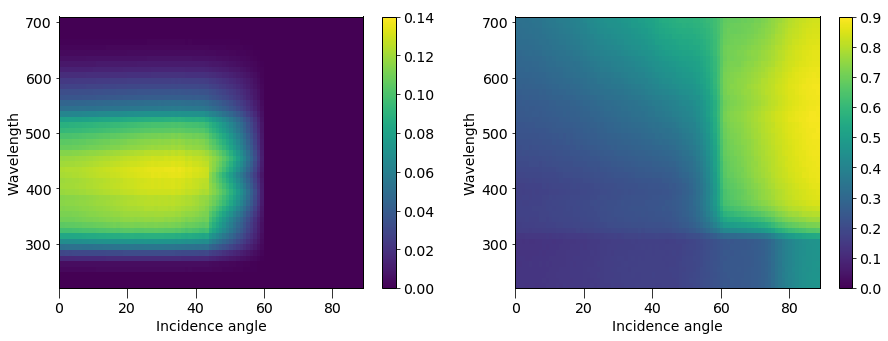

In [114]:
xaxis = np.arange(0,90)
yaxis = np.arange(220, 720, 10)

myfig1 = plt.figure(figsize = (15,5))
myfig1.add_subplot(121)
plt.pcolor(xaxis, yaxis, abs1,
          vmin=0, vmax=0.14)
plt.colorbar()
plt.xlabel('Incidence angle')
plt.ylabel('Wavelength')

myfig1.add_subplot(122)
plt.pcolor(xaxis, yaxis, ref1,
          vmin=0, vmax=0.9)
plt.colorbar()
plt.xlabel('Incidence angle')
plt.ylabel('Wavelength')

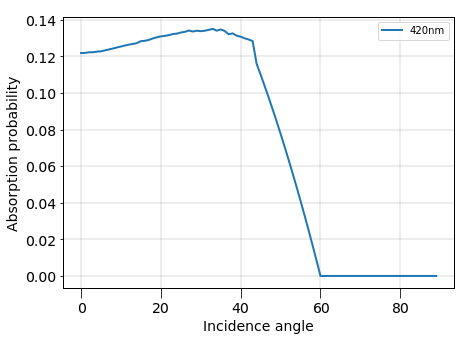

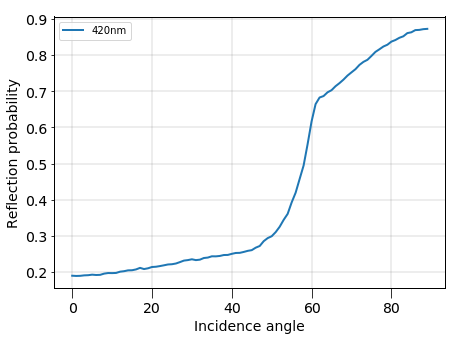

In [116]:
# Integrate around 420
yaxis
mybool = (yaxis>=420)*(yaxis <=420)

plt.figure(figsize=(7,5))
plt.plot(xaxis, abs1[mybool].mean(axis=0), label='420nm')
plt.xlabel('Incidence angle')
plt.ylabel('Absorption probability')
plt.legend(loc=0)



plt.figure(figsize=(7,5))
plt.plot(xaxis, ref1[mybool].mean(axis=0), label='420nm')
plt.xlabel('Incidence angle')
plt.ylabel('Reflection probability')
plt.legend(loc=0)

In [117]:
# Below follows Two huge (50*90=4500) blocks of absorption 
# probability and reflection probability taken from SNOMAN
# Functions evaluated as iTheta + iWavelength*90
# itheta given in radians (theta/degree) + 0.5
# iwlen = wlength*mm/(10.0) + 0.5
# Starts at 220 nm up until 710 nm
# Theta can take a value up to 90 (degrees)

In [118]:
#new_array = (', ').join([ "%0.5E" % x for x in greydisc1['reflection_probability']/4.]).replace('E', 'e')
new_array = (', ').join([ "%0.5E" % 0. for x in greydisc1['reflection_probability']/4.]).replace('E', 'e')


In [119]:
shutil.copyfile(gd_tmp, gd_mod)
txt_file = open(gd_mod, "a")
txt_file.write('reflection_probability: [ ' + new_array + ', ],')
txt_file.write('\n}')
txt_file.close()

In [120]:
greydisc_mod = ratdb_reader.readfile(gd_mod)


String  type
Number  version
String  index
Array  run_range
Number  pass
String  comment
String  timestamp
Number  travel_time
Number  decay_constant
Number  bounce_spread
Number  disc_radius
Number  collection_efficiency
Number  pmt_ellipsoid_a
Number  pmt_ellipsoid_b
Number  pmt_ellipsoid_minz_contact
Number  reflection_model_pmt_nreflections_rotation
Array  reflection_model_pmt_nreflections_coeffs
Array  reflection_model_conc_nreflections_coeffs
Number  reflection_model_spmt_trot
Number  reflection_model_spmt_tspread
Number  reflection_model_spmt_tmean
Number  reflection_model_spmt_pflat
Number  reflection_model_spmt_pspread
Number  reflection_tdelay_spmt
Number  reflection_model_mpmt_trot
Number  reflection_model_mpmt_tmean
Number  reflection_model_mpmt_tspread
Array  reflection_model_mpmt_pspread
Array  reflection_model_mpmt_pmean
Number  reflection_tdelay_mpmpt
Number  reflection_model_conc_tspread
Array  reflection_model_conc_coeffs
Number  reflection_model_mconc_pspread
Number 

In [121]:
print greydisc_mod['reflection_probability'].shape
print 50*90

(4500,)
4500


In [122]:
abs1 = greydisc_mod['absorption_probability'].reshape([50,90])
ref1 = greydisc_mod['reflection_probability'].reshape([50,90])
#abs2 = greydisc2['absorption_probability'].reshape([50,90])
#ref2 = greydisc2['reflection_probability'].reshape([50,90])

Text(0,0.5,'Wavelength')

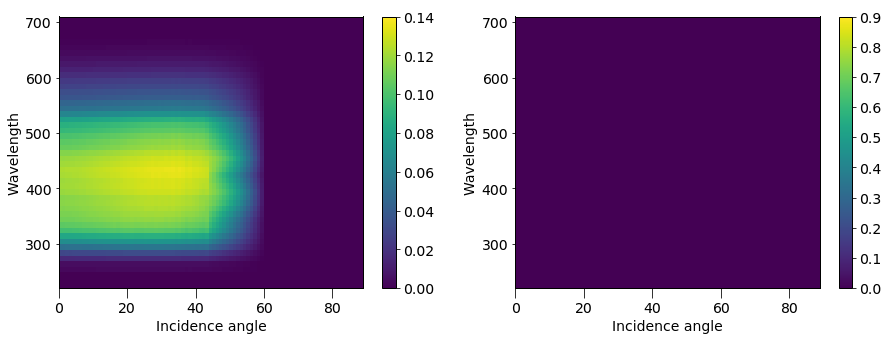

In [123]:
xaxis = range(0,90)
yaxis = range(220, 720, 10)

myfig1 = plt.figure(figsize = (15,5))
myfig1.add_subplot(121)
plt.pcolor(xaxis, yaxis, abs1,
          vmin=0, vmax=0.14)
plt.colorbar()
plt.xlabel('Incidence angle')
plt.ylabel('Wavelength')

myfig1.add_subplot(122)
plt.pcolor(xaxis, yaxis, ref1,
          vmin=0, vmax=0.9)
plt.colorbar()
plt.xlabel('Incidence angle')
plt.ylabel('Wavelength')


